In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/breast-cancer-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/breast-cancer-dataset


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. Charger les données (remplace par ton chemin)

df = pd.read_csv("/kaggle/input/breast-cancer-dataset/breast-cancer.csv")
print(df.head())

# Vérifier les colonnes
print("Colonnes du dataset :", df.columns.tolist())

# Définir X et y
y = df["diagnosis"]   # ✅ colonne cible
X = df.drop(columns=["diagnosis"])

# Split stratifié
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print("Taille X_train :", X_train.shape)
print("Taille X_test  :", X_test.shape)
print("\nRépartition classes dans y_train :")
print(y_train.value_counts(normalize=True))
print("\nRépartition classes dans y_test :")
print(y_test.value_counts(normalize=True))


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# === IMPORT DES MODELES ===
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC                                                                                                                                                                       

# 4. Définir les modèles à tester
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel="rbf", probability=True, random_state=42)
}

# 5. Entraîner et évaluer chaque modèle avec un pipeline
results = {}

for name, model in models.items():
    # pipeline avec preprocessing (scaler uniquement pour X)
    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("clf", model)
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    print(f"\n===== {name} =====")
    print("Accuracy:", round(acc, 4))
    print(classification_report(y_test, y_pred))

# 6. Résumé des scores
print("\nRésumé des performances :")
for name, acc in results.items():
    print(f"{name}: {acc:.4f}")


===== KNN =====
Accuracy: 0.9561
              precision    recall  f1-score   support

           B       0.95      0.99      0.97        72
           M       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


===== Logistic Regression =====
Accuracy: 0.9649
              precision    recall  f1-score   support

           B       0.96      0.99      0.97        72
           M       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


===== Naive Bayes =====
Accuracy: 0.9211
              precision    recall  f1-score   support

           B       0.92      0.96      0.94        72
           M       0.92      0.86      0.89        42

    accuracy                           0.92       114
  

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, f1_score, balanced_accuracy_score, roc_auc_score,
    matthews_corrcoef, recall_score, make_scorer
)

# === IMPORT DES MODELES ===
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# 1. Charger le dataset
df = pd.read_csv("/kaggle/input/breast-cancer-dataset/breast-cancer.csv")

# 2. Séparer X et y
y = df["diagnosis"].map({"M": 1, "B": 0})   # Encodage cible : M=1, B=0
X = df.drop(columns=["diagnosis"])

# 3. Définir les modèles
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel="rbf", probability=True, random_state=42)
}

# 4. Définir les scorers
scoring = {
    "accuracy": "accuracy",
    "f1": "f1",
    "balanced_accuracy": "balanced_accuracy",
    "roc_auc": "roc_auc",
    "mcc": make_scorer(matthews_corrcoef),
    "sensitivity": make_scorer(recall_score, pos_label=1)  # rappel classe positive (M)
}

# 5. Validation croisée
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = {}

for name, model in models.items():
    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("clf", model)
    ])
    
    cv_results = cross_validate(
        pipe, X, y,
        cv=cv,
        scoring=scoring,
        return_train_score=False
    )
    
    # Moyenne des scores
    results[name] = {metric: cv_results[f"test_{metric}"].mean() for metric in scoring}

# 6. Résumé des performances
results_df = pd.DataFrame(results).T
print("\nRésumé validation croisée (moyenne sur 5 folds) :")
print(results_df.round(4))



Résumé validation croisée (moyenne sur 5 folds) :
                     accuracy      f1  balanced_accuracy  roc_auc     mcc  \
KNN                    0.9649  0.9511             0.9577   0.9846  0.9252   
Logistic Regression    0.9719  0.9611             0.9662   0.9931  0.9411   
Naive Bayes            0.9280  0.9023             0.9206   0.9852  0.8485   
Random Forest          0.9543  0.9381             0.9494   0.9902  0.9056   
SVM                    0.9772  0.9688             0.9732   0.9945  0.9514   

                     sensitivity  
KNN                       0.9292  
Logistic Regression       0.9436  
Naive Bayes               0.8916  
Random Forest             0.9295  
SVM                       0.9576  


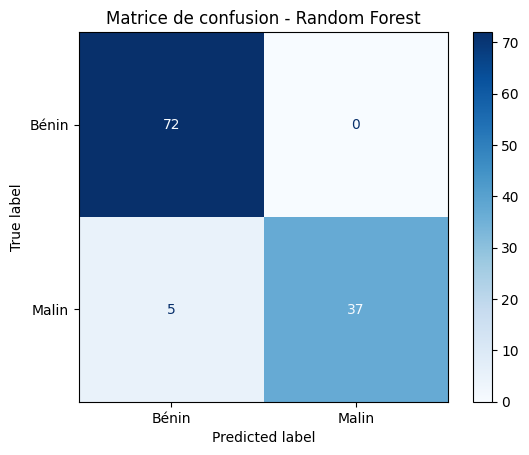

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Exemple avec Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Pipeline
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", RandomForestClassifier(n_estimators=100, random_state=42))
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Bénin", "Malin"])
disp.plot(cmap="Blues")
plt.title("Matrice de confusion - Random Forest")
plt.show()



===== KNN =====
accuracy: 0.9649
f1: 0.9511
balanced_accuracy: 0.9577
roc_auc: 0.9846
mcc: 0.9252
sensitivity: 0.9292


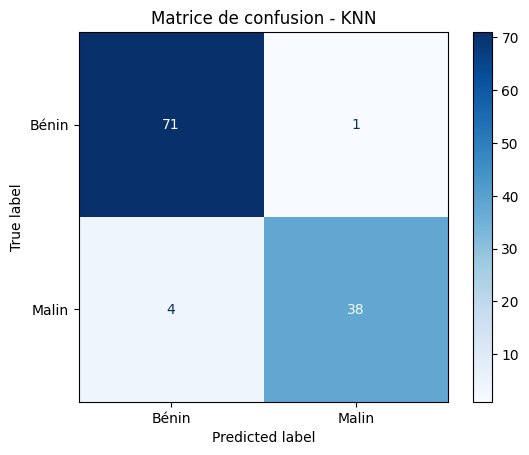

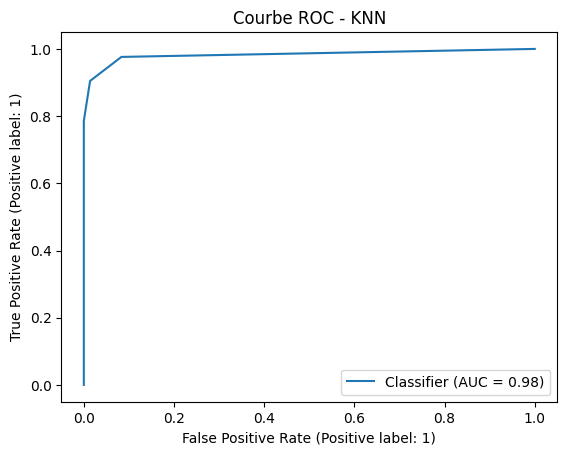

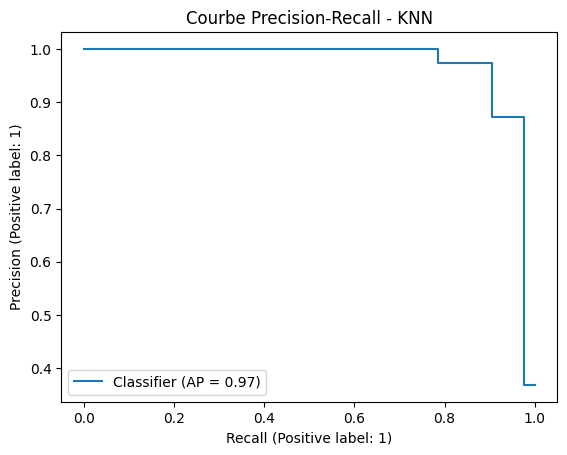


===== Logistic Regression =====
accuracy: 0.9719
f1: 0.9611
balanced_accuracy: 0.9662
roc_auc: 0.9931
mcc: 0.9411
sensitivity: 0.9436


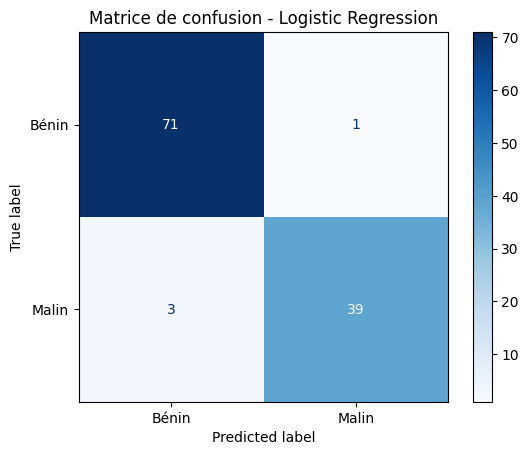

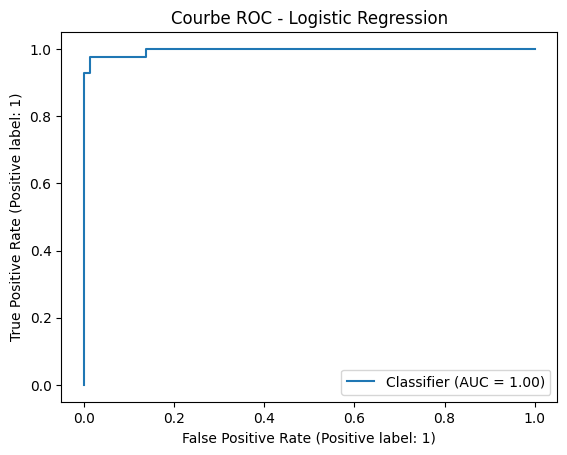

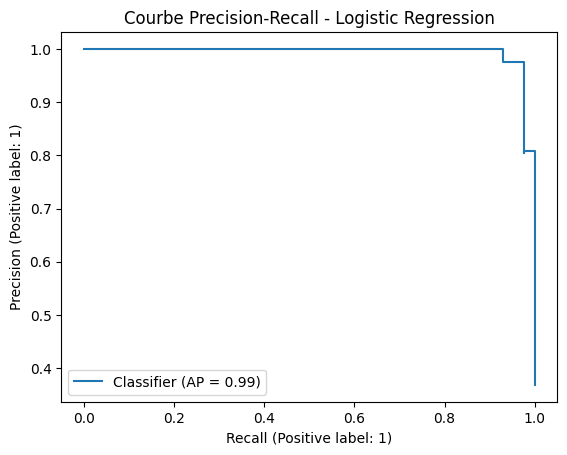


===== Naive Bayes =====
accuracy: 0.9280
f1: 0.9023
balanced_accuracy: 0.9206
roc_auc: 0.9852
mcc: 0.8485
sensitivity: 0.8916


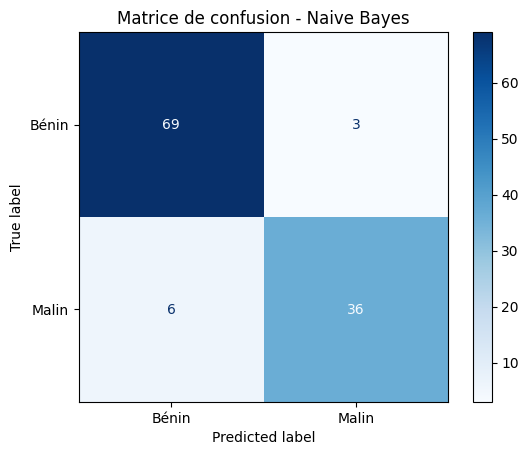

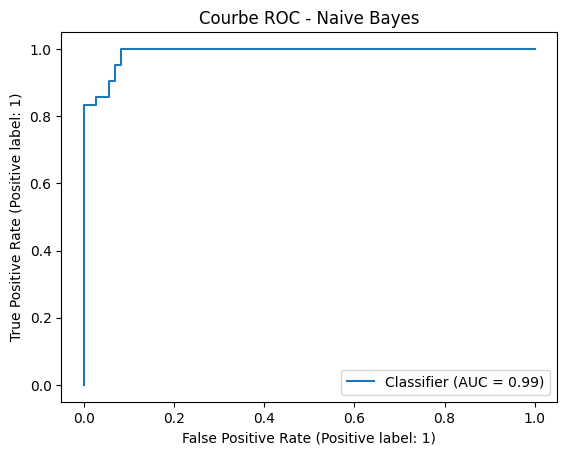

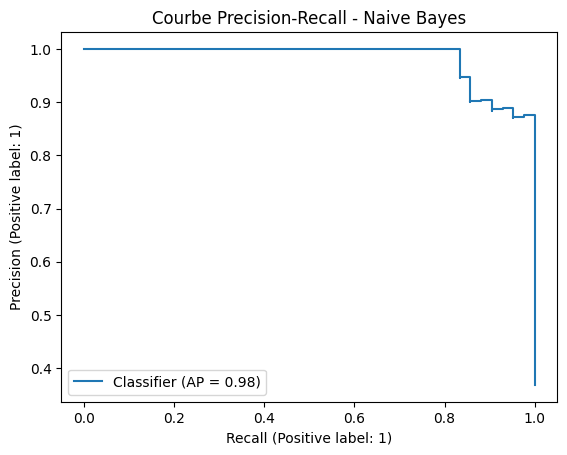


===== Random Forest =====
accuracy: 0.9543
f1: 0.9381
balanced_accuracy: 0.9494
roc_auc: 0.9902
mcc: 0.9056
sensitivity: 0.9295


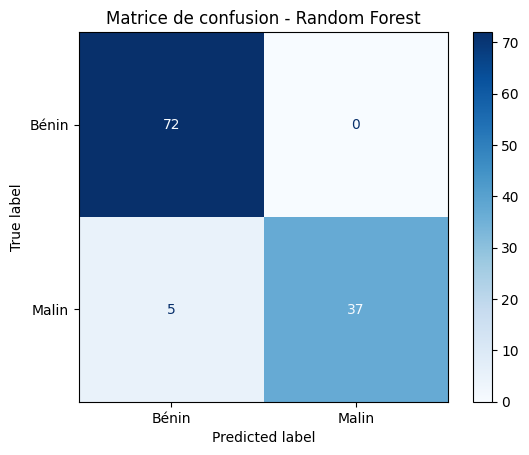

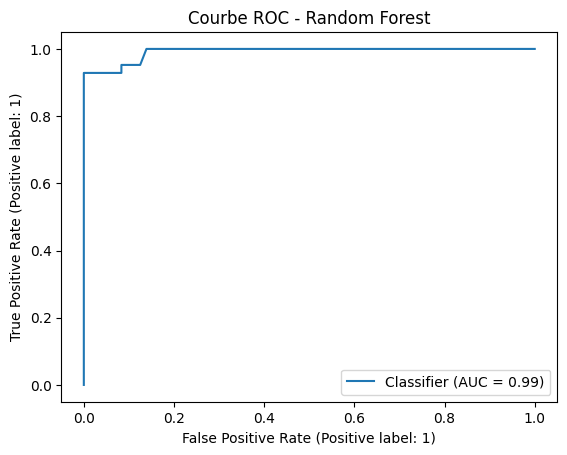

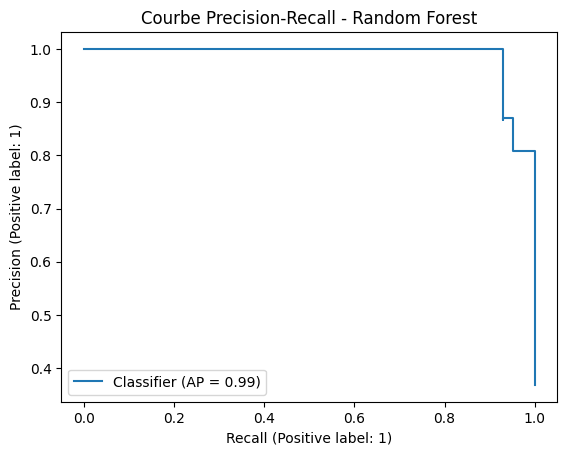


===== SVM =====
accuracy: 0.9772
f1: 0.9688
balanced_accuracy: 0.9732
roc_auc: 0.9945
mcc: 0.9514
sensitivity: 0.9576


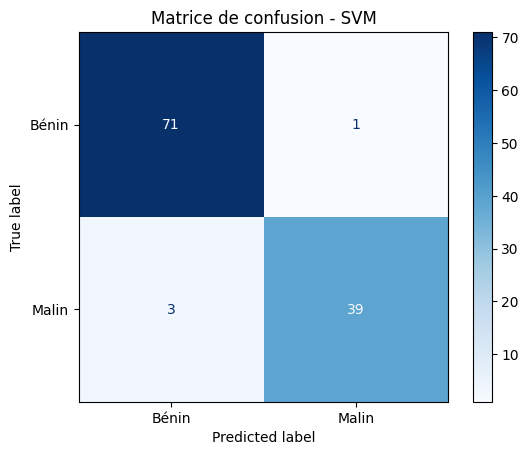

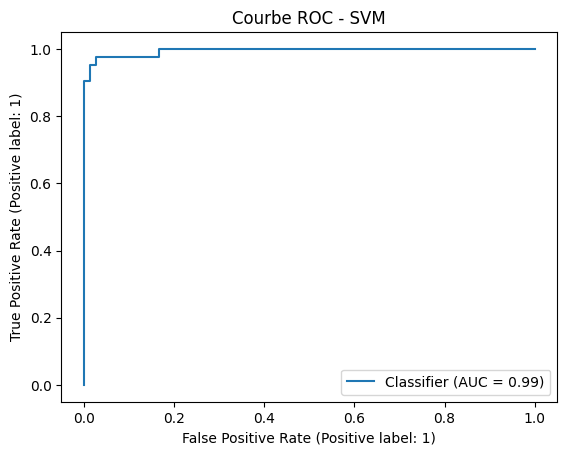

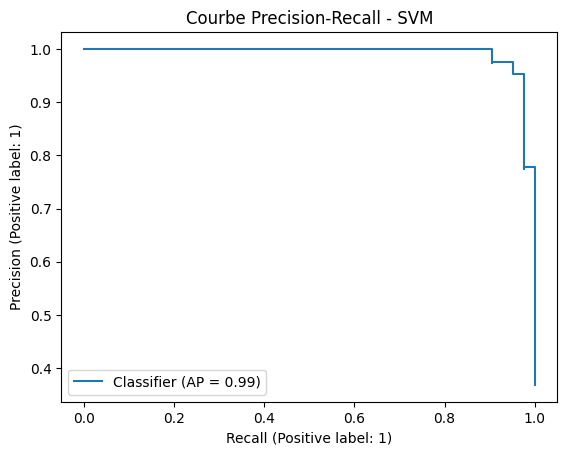


Résumé des performances (moyenne CV) :
                     accuracy      f1  balanced_accuracy  roc_auc     mcc  \
KNN                    0.9649  0.9511             0.9577   0.9846  0.9252   
Logistic Regression    0.9719  0.9611             0.9662   0.9931  0.9411   
Naive Bayes            0.9280  0.9023             0.9206   0.9852  0.8485   
Random Forest          0.9543  0.9381             0.9494   0.9902  0.9056   
SVM                    0.9772  0.9688             0.9732   0.9945  0.9514   

                     sensitivity  
KNN                       0.9292  
Logistic Regression       0.9436  
Naive Bayes               0.8916  
Random Forest             0.9295  
SVM                       0.9576  


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, f1_score, balanced_accuracy_score, roc_auc_score,
    matthews_corrcoef, recall_score, make_scorer, confusion_matrix, ConfusionMatrixDisplay,
    RocCurveDisplay, PrecisionRecallDisplay
)

# === Import des modèles ===
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# 1. Charger le dataset
df = pd.read_csv("/kaggle/input/breast-cancer-dataset/breast-cancer.csv")

# 2. Encodage cible : M=1 (malin), B=0 (bénin)
y = df["diagnosis"].map({"M": 1, "B": 0})
X = df.drop(columns=["diagnosis"])

# 3. Split stratifié train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# 4. Définir les modèles
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel="rbf", probability=True, random_state=42)
}

# 5. Définir les métriques pour cross-validation
scoring = {
    "accuracy": "accuracy",
    "f1": "f1",
    "balanced_accuracy": "balanced_accuracy",
    "roc_auc": "roc_auc",
    "mcc": make_scorer(matthews_corrcoef),
    "sensitivity": make_scorer(recall_score, pos_label=1)
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = {}

# 6. Boucle sur chaque modèle
for name, model in models.items():
    print(f"\n===== {name} =====")
    
    # Pipeline
    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("clf", model)
    ])
    
    # Cross-validation
    cv_results = cross_validate(pipe, X, y, cv=cv, scoring=scoring, return_train_score=False)
    
    # Moyenne des scores
    mean_scores = {metric: cv_results[f"test_{metric}"].mean() for metric in scoring}
    results[name] = mean_scores
    
    for metric, score in mean_scores.items():
        print(f"{metric}: {score:.4f}")
    
    # Entraînement sur l'ensemble train pour matrice confusion et courbes
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    if hasattr(pipe.named_steps["clf"], "predict_proba"):
        y_proba = pipe.predict_proba(X_test)[:, 1]
    else:
        y_proba = pipe.decision_function(X_test)
    
    # Matrice de confusion
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=["Bénin", "Malin"])
    disp.plot(cmap="Blues")
    plt.title(f"Matrice de confusion - {name}")
    plt.show()
    
    # Courbe ROC
    RocCurveDisplay.from_predictions(y_test, y_proba)
    plt.title(f"Courbe ROC - {name}")
    plt.show()
    
    # Courbe Precision-Recall
    PrecisionRecallDisplay.from_predictions(y_test, y_proba)
    plt.title(f"Courbe Precision-Recall - {name}")
    plt.show()

# 7. Comparaison résumé
results_df = pd.DataFrame(results).T.round(4)
print("\nRésumé des performances (moyenne CV) :")
print(results_df)


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import make_scorer, matthews_corrcoef, recall_score

# Modèles
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# 1. Charger le dataset
df = pd.read_csv("/kaggle/input/breast-cancer-dataset/breast-cancer.csv")
y = df["diagnosis"].map({"M":1,"B":0})
X = df.drop(columns=["diagnosis"])

# 2. Split stratifié
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3. Définir les modèles
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel="rbf", probability=True, random_state=42)
}

# 4. Définir les métriques
scoring = {
    "accuracy":"accuracy",
    "f1":"f1",
    "balanced_accuracy":"balanced_accuracy",
    "roc_auc":"roc_auc",
    "mcc":make_scorer(matthews_corrcoef),
    "sensitivity":make_scorer(recall_score, pos_label=1)
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 5. Pipeline avec sélection de variables
results_filter = {}
k_best = 10  # nombre de variables à conserver

for name, model in models.items():
    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("feature_selection", SelectKBest(score_func=f_classif, k=k_best)),
        ("clf", model)
    ])
    
    cv_results = cross_validate(pipe, X, y, cv=cv, scoring=scoring)
    
    # Moyenne des scores
    mean_scores = {metric: cv_results[f"test_{metric}"].mean() for metric in scoring}
    results_filter[name] = mean_scores
    
    print(f"\n===== {name} (Filter: top {k_best} features) =====")
    for metric, score in mean_scores.items():
        print(f"{metric}: {score:.4f}")



===== KNN (Filter: top 10 features) =====
accuracy: 0.9420
f1: 0.9213
balanced_accuracy: 0.9366
roc_auc: 0.9771
mcc: 0.8768
sensitivity: 0.9153

===== Logistic Regression (Filter: top 10 features) =====
accuracy: 0.9508
f1: 0.9322
balanced_accuracy: 0.9446
roc_auc: 0.9893
mcc: 0.8960
sensitivity: 0.9200

===== Naive Bayes (Filter: top 10 features) =====
accuracy: 0.9421
f1: 0.9220
balanced_accuracy: 0.9376
roc_auc: 0.9833
mcc: 0.8794
sensitivity: 0.9199

===== Random Forest (Filter: top 10 features) =====
accuracy: 0.9456
f1: 0.9256
balanced_accuracy: 0.9394
roc_auc: 0.9849
mcc: 0.8843
sensitivity: 0.9153

===== SVM (Filter: top 10 features) =====
accuracy: 0.9420
f1: 0.9183
balanced_accuracy: 0.9308
roc_auc: 0.9850
mcc: 0.8764
sensitivity: 0.8868


In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif, RFE, SelectFromModel
from sklearn.metrics import make_scorer, matthews_corrcoef, recall_score

# Modèles
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# 1️⃣ Charger dataset
df = pd.read_csv("/kaggle/input/breast-cancer-dataset/breast-cancer.csv")
y = df["diagnosis"].map({"M":1,"B":0})
X = df.drop(columns=["diagnosis"])

# 2️⃣ Split stratifié
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3️⃣ Définir les modèles
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel="rbf", probability=True, random_state=42)
}

# 4️⃣ Définir les métriques
scoring = {
    "accuracy":"accuracy",
    "f1":"f1",
    "balanced_accuracy":"balanced_accuracy",
    "roc_auc":"roc_auc",
    "mcc":make_scorer(matthews_corrcoef),
    "sensitivity":make_scorer(recall_score, pos_label=1)
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 5️⃣ Sélection de variables
k_best = 10

# Filter : SelectKBest
filter_selector = SelectKBest(score_func=f_classif, k=k_best)
X_train_filter = filter_selector.fit_transform(X_train, y_train)
X_test_filter = filter_selector.transform(X_test)

# Embedded : Random Forest
rf_embedded = RandomForestClassifier(n_estimators=100, random_state=42)
rf_embedded.fit(X_train, y_train)
sfm = SelectFromModel(rf_embedded, max_features=k_best, threshold=-np.inf)
sfm.fit(X_train, y_train)
X_train_embedded = sfm.transform(X_train)
X_test_embedded = sfm.transform(X_test)

# Wrapper : RFE Logistic Regression
lr = LogisticRegression(max_iter=1000)
rfe = RFE(lr, n_features_to_select=k_best)
rfe.fit(X_train, y_train)
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# 6️⃣ Fonction pour cross-validation
def evaluate_models(X_train_set, y_train_set, description):
    results = {}
    print(f"\n===== Evaluation: {description} =====")
    for name, model in models.items():
        pipe = Pipeline([
            ("scaler", StandardScaler()),
            ("clf", model)
        ])
        cv_results = cross_validate(pipe, X_train_set, y_train_set, cv=cv, scoring=scoring)
        mean_scores = {metric: cv_results[f"test_{metric}"].mean() for metric in scoring}
        results[name] = mean_scores
        print(f"\n{name}:")
        for metric, score in mean_scores.items():
            print(f"  {metric}: {score:.4f}")
    return pd.DataFrame(results).T.round(4)

# 7️⃣ Évaluer tous les sets de variables
results_all = evaluate_models(X_train, y_train, "Toutes les variables")
results_filter = evaluate_models(X_train_filter, y_train, f"Filter (Top {k_best})")
results_embedded = evaluate_models(X_train_embedded, y_train, f"Embedded (Top {k_best})")
results_rfe = evaluate_models(X_train_rfe, y_train, f"Wrapper RFE (Top {k_best})")

# 8️⃣ Résumé comparatif
print("\n===== Résumé comparatif =====")
print("Toutes les variables:\n", results_all)
print("\nFilter:\n", results_filter)
print("\nEmbedded:\n", results_embedded)
print("\nWrapper RFE:\n", results_rfe)



===== Evaluation: Toutes les variables =====

KNN:
  accuracy: 0.9670
  f1: 0.9540
  balanced_accuracy: 0.9583
  roc_auc: 0.9873
  mcc: 0.9301
  sensitivity: 0.9235

Logistic Regression:
  accuracy: 0.9736
  f1: 0.9640
  balanced_accuracy: 0.9695
  roc_auc: 0.9950
  mcc: 0.9444
  sensitivity: 0.9529

Naive Bayes:
  accuracy: 0.9341
  f1: 0.9119
  balanced_accuracy: 0.9296
  roc_auc: 0.9851
  mcc: 0.8605
  sensitivity: 0.9118

Random Forest:
  accuracy: 0.9626
  f1: 0.9489
  balanced_accuracy: 0.9571
  roc_auc: 0.9900
  mcc: 0.9202
  sensitivity: 0.9353

SVM:
  accuracy: 0.9692
  f1: 0.9581
  balanced_accuracy: 0.9648
  roc_auc: 0.9945
  mcc: 0.9347
  sensitivity: 0.9471

===== Evaluation: Filter (Top 10) =====

KNN:
  accuracy: 0.9429
  f1: 0.9223
  balanced_accuracy: 0.9366
  roc_auc: 0.9671
  mcc: 0.8783
  sensitivity: 0.9118

Logistic Regression:
  accuracy: 0.9538
  f1: 0.9370
  balanced_accuracy: 0.9465
  roc_auc: 0.9851
  mcc: 0.9018
  sensitivity: 0.9176

Naive Bayes:
  accurac

La stabilité des variables sélectionnées mesure à quel point les mêmes variables sont choisies à travers différents échantillons ou folds lors de la validation croisée.

Méthode : pour chaque fold, on applique la sélection (RFE, SelectFromModel, etc.) et on note quelles variables sont retenues.

Indicateur : on calcule la fréquence de sélection pour chaque variable (nombre de fois où elle est choisie ÷ nombre total de folds).

Interprétation :

Fréquence proche de 1 → variable très stable et robuste.

Fréquence faible → variable peu fiable, éventuellement à éliminer.

Cela permet d’identifier les variables les plus fiables pour construire un modèle final robuste.

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, matthews_corrcoef, recall_score

# Modèles avec class_weight
models_balanced = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    "SVM": SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42)
}

scoring = {
    "accuracy":"accuracy",
    "f1":"f1",
    "balanced_accuracy":"balanced_accuracy",
    "roc_auc":"roc_auc",
    "mcc":make_scorer(matthews_corrcoef),
    "sensitivity":make_scorer(recall_score, pos_label=1)
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def evaluate_models(X_train_set, y_train_set, description, models_dict):
    results = {}
    print(f"\n===== Evaluation: {description} =====")
    for name, model in models_dict.items():
        pipe = Pipeline([
            ("scaler", StandardScaler()),
            ("clf", model)
        ])
        cv_results = cross_validate(pipe, X_train_set, y_train_set, cv=cv, scoring=scoring)
        mean_scores = {metric: cv_results[f"test_{metric}"].mean() for metric in scoring}
        results[name] = mean_scores
        print(f"\n{name}:")
        for metric, score in mean_scores.items():
            print(f"  {metric}: {score:.4f}")
    return pd.DataFrame(results).T.round(4)

# Réentraîner sur toutes les variables
results_balanced = evaluate_models(X_train, y_train, "Modèles avec class_weight='balanced'", models_balanced)



===== Evaluation: Modèles avec class_weight='balanced' =====

Logistic Regression:
  accuracy: 0.9714
  f1: 0.9616
  balanced_accuracy: 0.9689
  roc_auc: 0.9941
  mcc: 0.9392
  sensitivity: 0.9588

Random Forest:
  accuracy: 0.9648
  f1: 0.9519
  balanced_accuracy: 0.9577
  roc_auc: 0.9905
  mcc: 0.9254
  sensitivity: 0.9294

SVM:
  accuracy: 0.9692
  f1: 0.9584
  balanced_accuracy: 0.9659
  roc_auc: 0.9945
  mcc: 0.9347
  sensitivity: 0.9529


In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, matthews_corrcoef, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.utils import resample

# Charger dataset et encoder la cible
df = pd.read_csv("/kaggle/input/breast-cancer-dataset/breast-cancer.csv")
y = df["diagnosis"].map({"M":1,"B":0})
X = df.drop(columns=["diagnosis"])

# Split stratifié
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Oversampling manuel de la classe minoritaire
train_data = pd.concat([X_train, y_train], axis=1)
minority = train_data[train_data['diagnosis']==1]
majority = train_data[train_data['diagnosis']==0]
minority_upsampled = resample(minority, replace=True, n_samples=len(majority), random_state=42)
train_resampled = pd.concat([majority, minority_upsampled])
X_train_res = train_resampled.drop(columns=['diagnosis'])
y_train_res = train_resampled['diagnosis']

# Modèles
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel="rbf", probability=True, random_state=42)
}

# Métriques
scoring = {
    "accuracy":"accuracy",
    "f1":"f1",
    "balanced_accuracy":"balanced_accuracy",
    "roc_auc":"roc_auc",
    "mcc":make_scorer(matthews_corrcoef),
    "sensitivity":make_scorer(recall_score, pos_label=1)
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Fonction d'évaluation
def evaluate_models(X_train_set, y_train_set, models_dict):
    results = {}
    for name, model in models_dict.items():
        pipe = Pipeline([("scaler", StandardScaler()), ("clf", model)])
        cv_results = cross_validate(pipe, X_train_set, y_train_set, cv=cv, scoring=scoring)
        results[name] = {metric: cv_results[f"test_{metric}"].mean() for metric in scoring}
    return pd.DataFrame(results).T.round(4)

# Évaluation après rééchantillonnage
results_resampled = evaluate_models(X_train_res, y_train_res, models)
print(results_resampled)


                     accuracy      f1  balanced_accuracy  roc_auc     mcc  \
KNN                    0.9754  0.9754             0.9754   0.9946  0.9514   
Logistic Regression    0.9912  0.9912             0.9912   0.9991  0.9825   
Naive Bayes            0.9491  0.9487             0.9491   0.9895  0.8990   
Random Forest          0.9825  0.9825             0.9825   0.9956  0.9652   
SVM                    0.9825  0.9824             0.9825   0.9985  0.9651   

                     sensitivity  
KNN                       0.9719  
Logistic Regression       0.9930  
Naive Bayes               0.9404  
Random Forest             0.9895  
SVM                       0.9825  


In [42]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import wilcoxon

# Exemple avec X_train, y_train déjà définis
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Définir pipelines
rf_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", RandomForestClassifier(n_estimators=100, random_state=42))
])
lr_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=1000))
])

# Cross-validation pour accuracy
rf_scores = cross_val_score(rf_pipe, X_train, y_train, cv=cv, scoring="accuracy")
lr_scores = cross_val_score(lr_pipe, X_train, y_train, cv=cv, scoring="accuracy")

print("RF scores:", rf_scores)
print("LR scores:", lr_scores)

# Test de Wilcoxon avec gestion des différences nulles
stat, p_value = wilcoxon(rf_scores, lr_scores, zero_method="zsplit")
print(f"Wilcoxon test: stat={stat}, p-value={p_value}")

if p_value < 0.05:
    print("Différence statistiquement significative entre les modèles")
else:
    print("Aucune différence statistiquement significative entre les modèles")


RF scores: [0.95604396 0.98901099 0.94505495 0.95604396 0.96703297]
LR scores: [0.95604396 0.96703297 1.         0.97802198 0.96703297]
Wilcoxon test: stat=5.5, p-value=0.75
Aucune différence statistiquement significative entre les modèles


In [53]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from scipy.stats import friedmanchisquare

# Modèles à comparer
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel="rbf", probability=True, random_state=42)
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = "accuracy"  # ou f1, balanced_accuracy, etc.

# Collecte des scores pour chaque modèle
scores_dict = {}
for name, model in models.items():
    pipe = Pipeline([("scaler", StandardScaler()), ("clf", model)])
    scores = cross_val_score(pipe, X_train, y_train, cv=cv, scoring=scoring)
    scores_dict[name] = scores

# Transformer en DataFrame
scores_df = pd.DataFrame(scores_dict)
print("Scores CV pour chaque modèle:\n", scores_df)

# Test de Friedman
stat, p_value = friedmanchisquare(*[scores_df[model] for model in scores_df.columns])
print(f"\nTest de Friedman: stat={stat:.4f}, p-value={p_value:.4f}")

if p_value < 0.05:
    print("Il existe une différence significative entre les modèles")
else:
    print("Aucune différence significative détectée entre les modèles")

Scores CV pour chaque modèle:
         KNN  Logistic Regression  Naive Bayes  Random Forest       SVM
0  0.967033             0.956044     0.956044       0.956044  0.967033
1  1.000000             0.967033     0.978022       0.989011  0.978022
2  0.956044             1.000000     0.912088       0.945055  0.967033
3  0.934066             0.978022     0.890110       0.956044  0.956044
4  0.978022             0.967033     0.934066       0.967033  0.978022

Test de Friedman: stat=7.8681, p-value=0.0965
Aucune différence significative détectée entre les modèles


In [55]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate

# 1️⃣ Copier X_train
X_train_missing = X_train.copy()

# 2️⃣ Introduire des valeurs manquantes (10%)
missing_rate = 0.1
np.random.seed(42)
for col in X_train_missing.columns:
    X_train_missing.loc[X_train_missing.sample(frac=missing_rate).index, col] = np.nan

print("Valeurs manquantes introduites par colonne:\n", X_train_missing.isna().sum())

# 3️⃣ Pipeline avec imputation simple + scaler + modèle
pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),  # ou "median"
    ("scaler", StandardScaler()),
    ("clf", RandomForestClassifier(n_estimators=100, random_state=42))
])

# 4️⃣ Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = ["accuracy", "f1", "balanced_accuracy", "roc_auc"]

cv_results = cross_validate(pipeline, X_train_missing, y_train, cv=cv, scoring=scoring)

# 5️⃣ Afficher les métriques moyennes
for metric in scoring:
    print(f"{metric}: {cv_results['test_'+metric].mean():.4f}")


Valeurs manquantes introduites par colonne:
 id                         46
radius_mean                46
texture_mean               46
perimeter_mean             46
area_mean                  46
smoothness_mean            46
compactness_mean           46
concavity_mean             46
concave points_mean        46
symmetry_mean              46
fractal_dimension_mean     46
radius_se                  46
texture_se                 46
perimeter_se               46
area_se                    46
smoothness_se              46
compactness_se             46
concavity_se               46
concave points_se          46
symmetry_se                46
fractal_dimension_se       46
radius_worst               46
texture_worst              46
perimeter_worst            46
area_worst                 46
smoothness_worst           46
compactness_worst          46
concavity_worst            46
concave points_worst       46
symmetry_worst             46
fractal_dimension_worst    46
dtype: int64
accuracy: 0.

In [56]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
import pandas as pd

# Copier X_train et introduire des valeurs manquantes artificiellement
X_train_missing = X_train.copy()
missing_rate = 0.1
np.random.seed(42)
for col in X_train_missing.columns:
    X_train_missing.loc[X_train_missing.sample(frac=missing_rate).index, col] = np.nan

print("Valeurs manquantes introduites:\n", X_train_missing.isna().sum())

# Méthodes d'imputation à tester
imputation_methods = {
    "mean": SimpleImputer(strategy="mean"),
    "median": SimpleImputer(strategy="median"),
    "most_frequent": SimpleImputer(strategy="most_frequent")
}

# Modèle à utiliser
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = ["accuracy", "f1", "balanced_accuracy", "roc_auc"]

results = {}

for name, imputer in imputation_methods.items():
    pipeline = Pipeline([
        ("imputer", imputer),
        ("scaler", StandardScaler()),
        ("clf", model)
    ])
    cv_results = cross_validate(pipeline, X_train_missing, y_train, cv=cv, scoring=scoring)
    results[name] = {metric: cv_results[f"test_{metric}"].mean() for metric in scoring}

# Afficher les résultats
results_df = pd.DataFrame(results).T.round(4)
print("\nComparaison des méthodes d'imputation:\n", results_df)


Valeurs manquantes introduites:
 id                         46
radius_mean                46
texture_mean               46
perimeter_mean             46
area_mean                  46
smoothness_mean            46
compactness_mean           46
concavity_mean             46
concave points_mean        46
symmetry_mean              46
fractal_dimension_mean     46
radius_se                  46
texture_se                 46
perimeter_se               46
area_se                    46
smoothness_se              46
compactness_se             46
concavity_se               46
concave points_se          46
symmetry_se                46
fractal_dimension_se       46
radius_worst               46
texture_worst              46
perimeter_worst            46
area_worst                 46
smoothness_worst           46
compactness_worst          46
concavity_worst            46
concave points_worst       46
symmetry_worst             46
fractal_dimension_worst    46
dtype: int64

Comparaison des méthode